In [42]:
import os

In [43]:
# location of the folder
os.chdir(r'E:\mangrove_all')

In [3]:
#pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [44]:
# reading shapefile using geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#pip install numexpr --upgrade --user


Requirement already up-to-date: numexpr in c:\users\user\appdata\roaming\python\python38\site-packages (2.8.6)
Note: you may need to restart the kernel to use updated packages.


In [45]:
shapefile=gpd.read_file(r'E:\mangrove_all\mangrove_all.shp')
shapefile.head()

,class,class_name,geometry
0,1,AI,"POLYGON ((194328.000 2489846.500, 194334.500 2..."
1,1,AI,"POLYGON ((194324.500 2489829.000, 194328.500 2..."
2,1,AI,"POLYGON ((194340.500 2489831.000, 194346.500 2..."
3,1,AI,"POLYGON ((194238.500 2489824.000, 194242.500 2..."
4,1,AI,"POLYGON ((194221.000 2489809.500, 194225.000 2..."


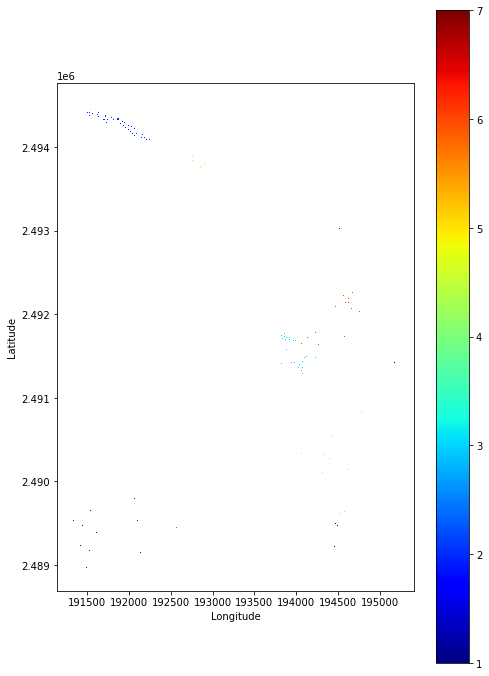

In [46]:
fig, ax=plt.subplots(1,figsize=(8,12))
shapefile.plot(ax=ax, column='class',cmap='jet',legend=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [47]:
# reading shapefile and converting shapefile into raster by using gdal
from osgeo import gdal, ogr, osr
input_shp=ogr.Open(r'E:\mangrove_all\mangrove_all.shp')
source_layer=input_shp.GetLayer()
defn=source_layer.GetLayerDefn()
column_names=[]
for n in range(defn.GetFieldCount()):
    fdefn=defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [48]:
column_names

['class', 'class_name']

In [49]:
shapefile.crs

<Projected CRS: PROJCS["UTM_Zone_50N",GEOGCS["WGS 84",DATUM["WGS_1 ...>
Name: UTM_Zone_50N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 50N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
output_raster_location=r'E:\output_raster_location\output_raster_location3.tif'
pixel_size=0.1
xmin, xmax, ymin, ymax=source_layer.GetExtent()
x_res=int(round((xmax-xmin)/pixel_size))
y_res=int(round((ymax-ymin)/pixel_size))
target_ds=gdal.GetDriverByName('GTiff').Create(output_raster_location,x_res,y_res,1,gdal.GDT_Float32,['COMPRESS=LZW'])
target_ds.SetGeoTransform((xmin,pixel_size,0.0,ymax,0.0,-pixel_size))
srse=osr.SpatialReference()
proj='EPSG:32650'
srse.SetWellKnownGeogCS(proj)
target_ds.SetProjection(srse.ExportToWkt())
band=target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1).SetNoDataValue(-9999)
band.Fill(-9999)
gdal.RasterizeLayer(target_ds,[1],source_layer,None,None,[1],options=['ALL_TOUCHED=TRUE','ATTRIBUTE=class'])
target_ds=None

In [52]:
#open raster by using xarray
import xarray as xr
raster=xr.open_rasterio(r'E:\output_raster_location\output_raster_location3.tif').squeeze()

<ipython-input-52-73ce58f523aa>:3: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster=xr.open_rasterio(r'E:\output_raster_location\output_raster_location3.tif').squeeze()


In [20]:
#pip install xarray

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
Note: you may need to restart the kernel to use updated packages.


In [53]:
import numpy as np
#np.float = np.float64
raster


<xarray.DataArray (y: 55235, x: 38815)>
[2143946525 values with dtype=float32]
Coordinates:
    band     int32 1
  * y        (y) float64 2.494e+06 2.494e+06 2.494e+06 ... 2.489e+06 2.489e+06
  * x        (x) float64 1.913e+05 1.913e+05 1.913e+05 ... 1.952e+05 1.952e+05
Attributes:
    transform:   (0.1, 0.0, 191333.0, 0.0, -0.1, 2494493.0)
    res:         (0.1, 0.1)
    is_tiled:    0
    nodatavals:  (-9999.0,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [54]:
raster.shape

(55235, 38815)

MemoryError: Unable to allocate 7.99 GiB for an array with shape (2143946525,) and data type float32

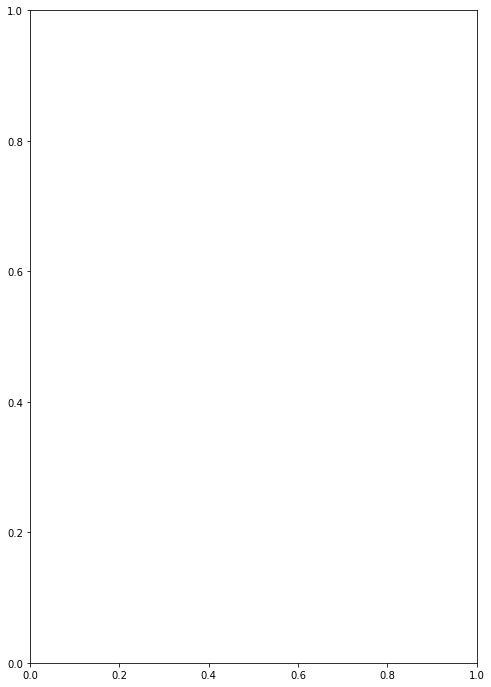

In [55]:
fig, ax=plt.subplots(1,figsize=(8,12))
raster.plot.imshow(cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show